In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from IPython.display import display, HTML

plt.style.use('ggplot')


path = r'F:\STUDY\python_code\Pract_DA\prepocess\patient_sepsis_all_dropdup_dropnull25.csv'
patient_data_all = pd.read_csv(path)
patient_data_all

,Unnamed: 0,subject_id,icustay_id,age,gender,marital_status,ethnicity,icu_duration_hour,icu_times,icu_times_total,...,spo_min,spo_max,spo_avg,spo_alarms,temp_min,temp_max,temp_avg,hospital_expire_flag,expire_flag,died_immediately
0,0,21,216859,87.82,M,MARRIED,WHITE,8.3647,2,2,...,75.0,100.0,95.47,8.0,96.3,100.3,97.98,1,1,1
1,1,33,296681,82.39,M,MARRIED,UNKNOWN/NOT SPECIFIED,1.5542,1,1,...,92.0,99.0,95.46,0.0,97.4,99.4,98.43,0,0,0
2,2,38,248910,75.94,M,WIDOWED,WHITE,25.5485,1,1,...,68.0,100.0,99.02,1.0,94.3,102.0,99.34,0,0,0
3,3,62,216609,68.77,M,MARRIED,PATIENT DECLINED TO ANSWER,2.8257,1,1,...,91.0,100.0,96.60,0.0,95.7,98.8,97.40,0,0,0
4,4,94,229012,74.43,M,MARRIED,ASIAN,1.0985,1,2,...,97.0,100.0,99.26,0.0,97.9,99.8,98.99,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,1069,32684,292417,300.00,M,MARRIED,WHITE,39.7662,1,2,...,70.0,100.0,98.68,15.0,94.3,101.8,98.17,0,1,0
918,1070,32701,260388,299.99,F,WIDOWED,WHITE,6.0730,1,1,...,89.0,100.0,96.41,1.0,96.2,99.9,97.96,0,1,0
919,1072,32746,275952,83.28,M,MARRIED,WHITE,5.5216,1,3,...,89.0,100.0,96.33,1.0,96.0,99.5,97.93,0,1,0
920,1073,32775,247825,32.89,M,SINGLE,WHITE,1.6860,3,5,...,92.0,100.0,97.25,0.0,97.6,102.1,99.08,0,0,0


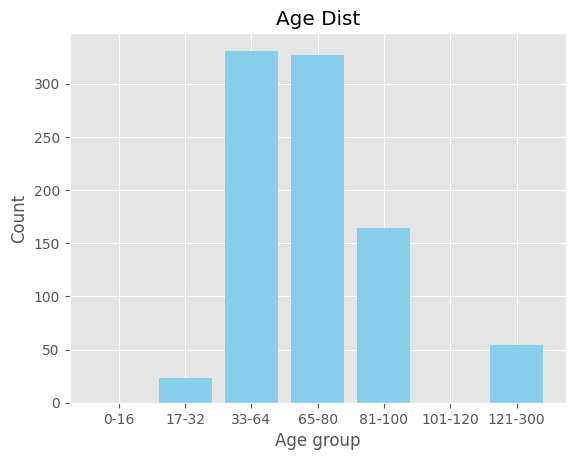

In [3]:
bins = [0, 16, 32, 64, 80, 100,120, 300]
labels = ['0-16', '17-32', '33-64', '65-80', '81-100', '101-120', '121-300']

patient_data_copy = patient_data_all
patient_data_copy['age_group'] = pd.cut(patient_data_copy['age'], bins=bins, labels=labels, right=False)

age_distribution = patient_data_copy['age_group'].value_counts().sort_index()
age_distribution = age_distribution.reset_index()
age_distribution.columns = ['Age Group', 'Count']


plt.bar(age_distribution['Age Group'], age_distribution['Count'], color='skyblue')
plt.title('Age Dist')
plt.xlabel('Age group')
plt.ylabel('Count')
plt.show()

  index  gender
0     M     484
1     F     438


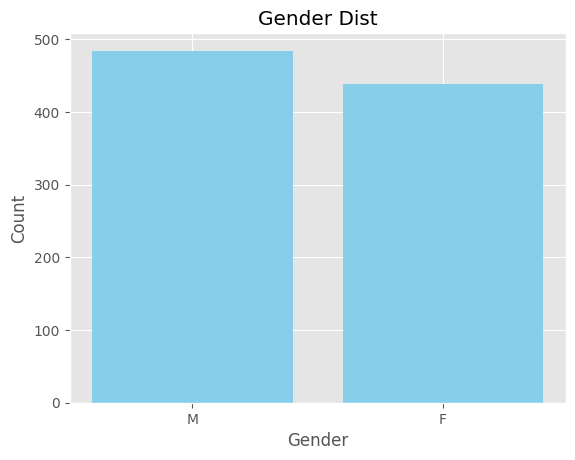

In [4]:
patient_gender = patient_data_copy['gender'].value_counts().reset_index()
print(patient_gender)
patient_gender.columns = ['gender','count']
plt.bar(patient_gender['gender'], patient_gender['count'],color='skyblue')
plt.title('Gender Dist')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

               index  marital_status
0            MARRIED             403
1             SINGLE             225
2            WIDOWED             166
3           DIVORCED              52
4          SEPARATED              13
5  UNKNOWN (DEFAULT)              12


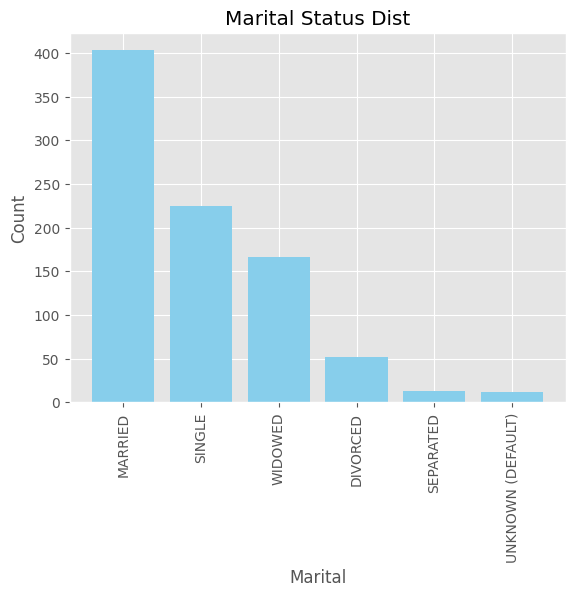

In [5]:
patient_marry = patient_data_copy['marital_status'].value_counts().reset_index()
print(patient_marry)
patient_marry.columns = ['marital','count']
plt.bar(patient_marry['marital'], patient_marry['count'],color='skyblue')
plt.title('Marital Status Dist')
plt.xlabel('Marital')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

                             index  ethnicity
0                            WHITE        672
1           BLACK/AFRICAN AMERICAN         96
2            UNKNOWN/NOT SPECIFIED         87
3               HISPANIC OR LATINO         25
4                            ASIAN         15
5                            OTHER         11
6       PATIENT DECLINED TO ANSWER          4
7                  ASIAN - CHINESE          3
8                 UNABLE TO OBTAIN          3
9               BLACK/CAPE VERDEAN          1
10            MULTI RACE ETHNICITY          1
11               ASIAN - CAMBODIAN          1
12  HISPANIC/LATINO - PUERTO RICAN          1
13               WHITE - BRAZILIAN          1
14     HISPANIC/LATINO - DOMINICAN          1


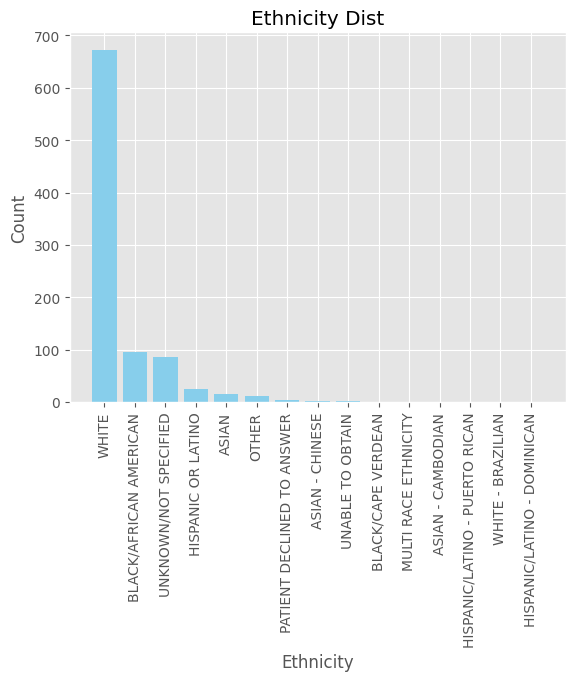

In [7]:
patient_eth = patient_data_copy['ethnicity'].value_counts().reset_index()
print(patient_eth)
patient_eth.columns = ['ethnicity','count']
plt.bar(patient_eth['ethnicity'], patient_eth['count'],color='skyblue')
plt.title('Ethnicity Dist')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

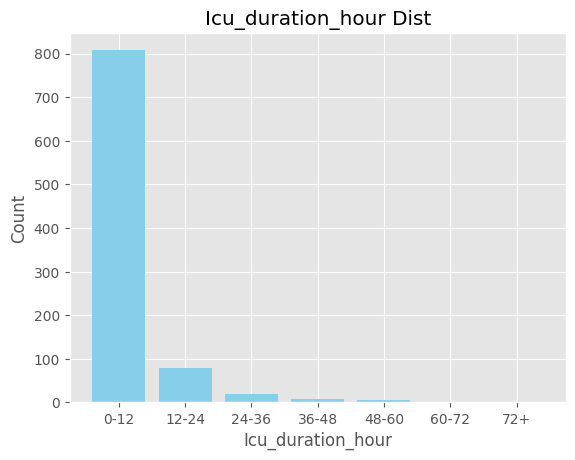

In [8]:
bins = [0, 12, 24, 36, 48, 60, 72, 1000]
labels = ['0-12', '12-24', '24-36', '36-48', '48-60', '60-72', '72+']

patient_data_copy = patient_data_all
patient_data_copy['icu_duration_hour'] = pd.cut(patient_data_copy['icu_duration_hour'], bins=bins, labels=labels, right=False)

age_distribution = patient_data_copy['icu_duration_hour'].value_counts().sort_index()
age_distribution = age_distribution.reset_index()
age_distribution.columns = ['icu_duration_hour', 'Count']


plt.bar(age_distribution['icu_duration_hour'], age_distribution['Count'], color='skyblue')
plt.title('Icu_duration_hour Dist')
plt.xlabel('Icu_duration_hour')
plt.ylabel('Count')
plt.show()